### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Assam.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,3289680,1714316,1575364
1,1911,3848617,2010211,1838406
2,1921,4636980,2445300,2191680
3,1931,5560371,2966568,2593803
4,1941,6694790,3569762,3125028


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

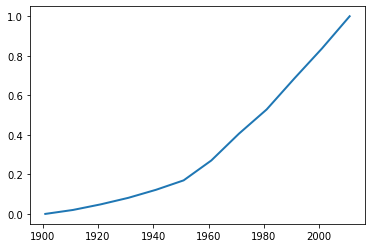

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9974269292008358

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2090501309889419, 1.4237220611940415, 1.6555168275329493, 1.90429490206958]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.209050
13,2031,1.423722
14,2041,1.655517
15,2051,1.904295


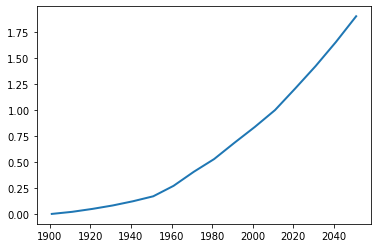

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


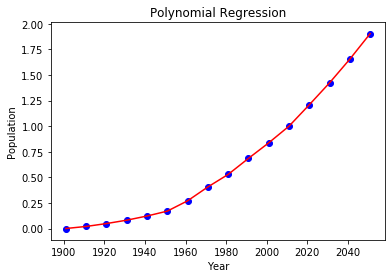

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[3289680.0,
 3848617.0,
 4636980.0,
 5560371.0,
 6694790.0,
 8028856.0,
 10837329.0,
 14625152.0,
 18041248.0,
 22414322.0,
 26655528.0,
 31205576.0,
 37041398.0,
 43034157.0,
 49504916.0,
 56449778.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,3289680.0
1,1911,3848617.0
2,1921,4636980.0
3,1931,5560371.0
4,1941,6694790.0
5,1951,8028856.0
6,1961,10837329.0
7,1971,14625152.0
8,1981,18041248.0
9,1991,22414322.0


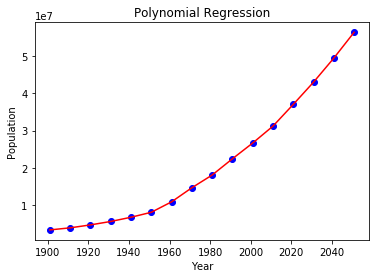

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.020801
2,1921,0.051387
3,1931,0.088031
4,1941,0.130434
5,1951,0.181683
6,1961,0.287102
7,1971,0.421784
8,1981,0.543385
9,1991,0.699022


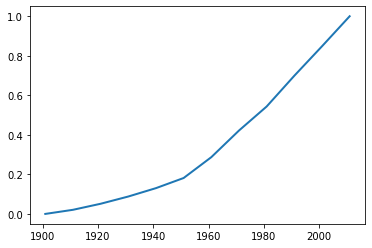

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9995254382703023

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.1982201369333438,
 1.3968705824515268,
 1.6078621025899906,
 1.8305008182250617]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.020801
2,1921,0.051387
3,1931,0.088031
4,1941,0.130434
5,1951,0.181683
6,1961,0.287102
7,1971,0.421784
8,1981,0.543385
9,1991,0.699022


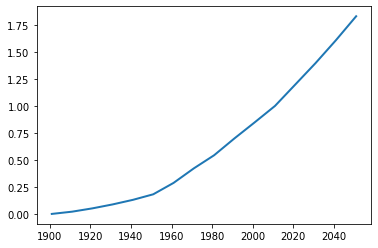

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

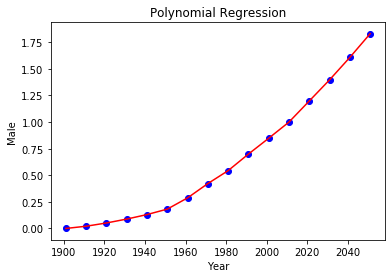

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[1714316.0,
 2010211.0,
 2445300.0,
 2966568.0,
 3569762.0,
 4298773.0,
 5798376.0,
 7714240.0,
 9444037.0,
 11657989.0,
 13777037.0,
 15939443.0,
 18759150.0,
 21584977.0,
 24586359.0,
 27753423.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,1714316.0
1,1911,2010211.0
2,1921,2445300.0
3,1931,2966568.0
4,1941,3569762.0
5,1951,4298773.0
6,1961,5798376.0
7,1971,7714240.0
8,1981,9444037.0
9,1991,11657989.0


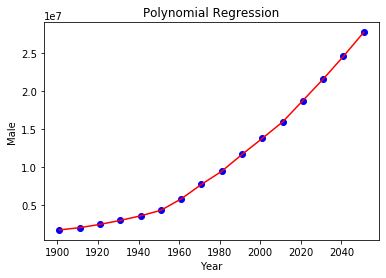

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.019213
2,1921,0.045017
3,1931,0.074389
4,1941,0.113190


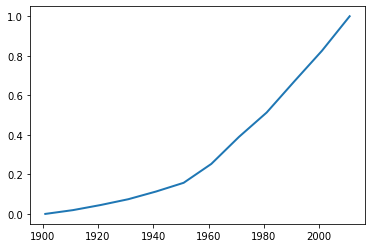

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9844878856092846

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.220302825258642, 1.4516215671884538, 1.705031541461011, 1.9809692079507215]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.220303
13,2031,1.451622
14,2041,1.705032
15,2051,1.980969


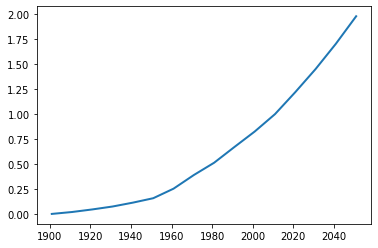

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

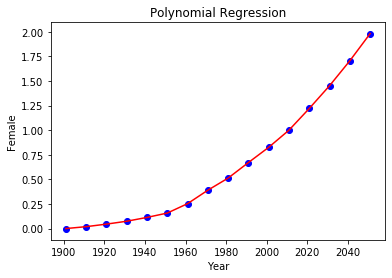

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[1575364.0,
 1838406.0,
 2191680.0,
 2593803.0,
 3125028.0,
 3730083.0,
 5038953.0,
 6910912.0,
 8597211.0,
 10756333.0,
 12878491.0,
 15266133.0,
 18282248.0,
 21449180.0,
 24918557.0,
 28696356.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,1575364.0
1,1911,1838406.0
2,1921,2191680.0
3,1931,2593803.0
4,1941,3125028.0
5,1951,3730083.0
6,1961,5038953.0
7,1971,6910912.0
8,1981,8597211.0
9,1991,10756333.0


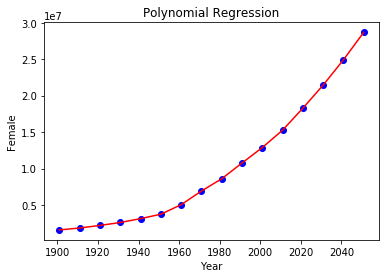

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [58]:
df4 = pd.concat([df1,df2,df3],axis=1)

In [59]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,3289680.0,1901,1714316.0,1901,1575364.0
1,1911,3848617.0,1911,2010211.0,1911,1838406.0
2,1921,4636980.0,1921,2445300.0,1921,2191680.0
3,1931,5560371.0,1931,2966568.0,1931,2593803.0
4,1941,6694790.0,1941,3569762.0,1941,3125028.0
5,1951,8028856.0,1951,4298773.0,1951,3730083.0
6,1961,10837329.0,1961,5798376.0,1961,5038953.0
7,1971,14625152.0,1971,7714240.0,1971,6910912.0
8,1981,18041248.0,1981,9444037.0,1981,8597211.0
9,1991,22414322.0,1991,11657989.0,1991,10756333.0
